In [228]:
from instagram_private_api import Client, ClientCompatPatch
import urllib.request
from PIL import Image

user_name = "feedback_bot_ds"
password = 'Sy123sy123'

api = Client(user_name, password)


In [241]:
from instagram_cache import to_json, from_json, onlogin_callback

In [244]:
onlogin_callback(api, 'my_setting')

SAVED: my_setting


In [229]:
import pandas as pd

In [230]:
uuid = Client.generate_uuid()

In [231]:
tags = api.feed_tag('ps4',uuid )

In [232]:
len(tags)

8

In [234]:
tag_image_2 = tags['items'][1]['carousel_media'][0]['image_versions2']['candidates'][0]['url']
tag_image_2 = Image.open(urllib.request.urlopen(tag_image_2))
tag_image_2

KeyError: 'carousel_media'

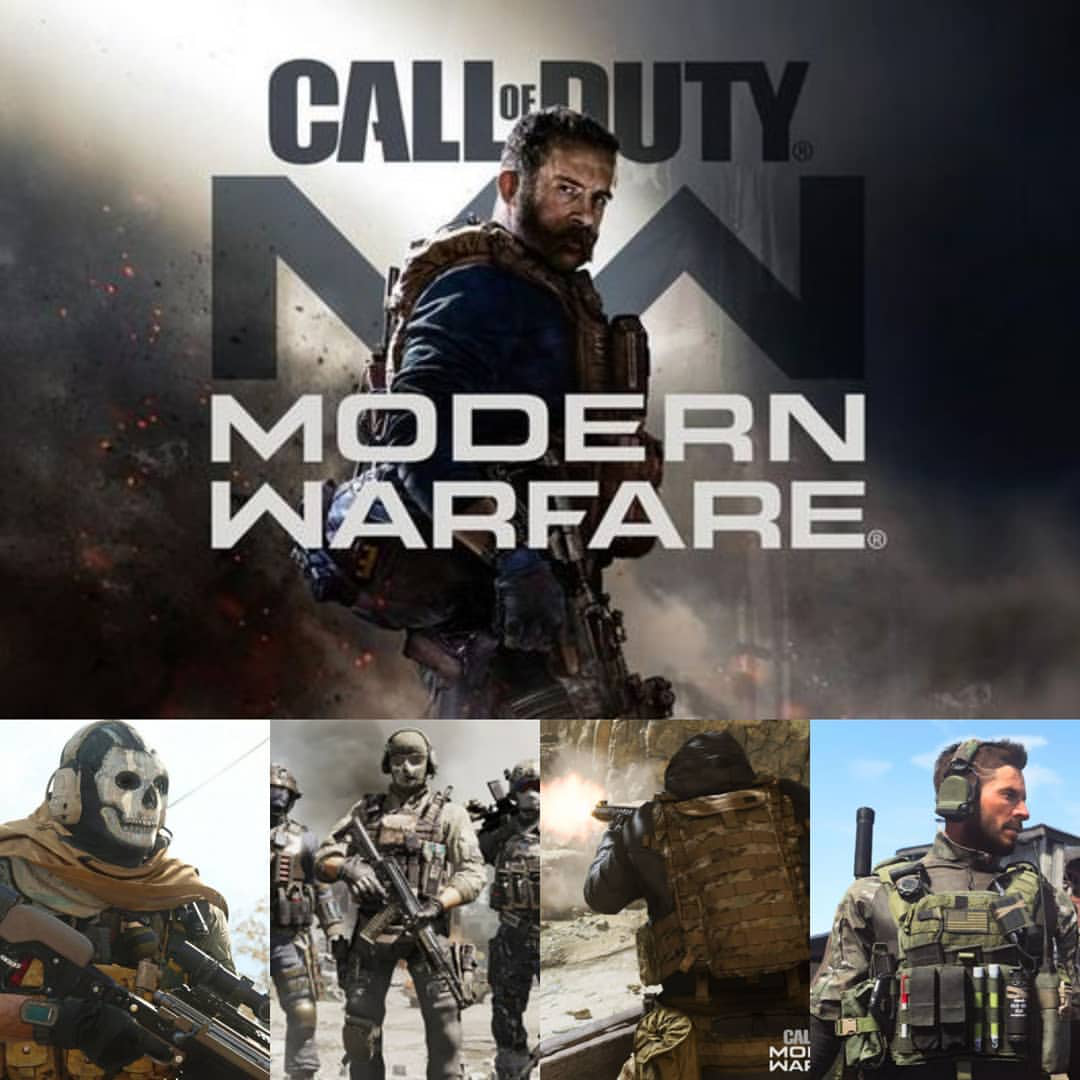

In [238]:
tag_image = tags['items'][4]['image_versions2']['candidates'][0]['url']
tag_image = Image.open(urllib.request.urlopen(tag_image))
tag_image

In [210]:
times = []
for i in range(len(tags)):
    time = tags['items'][i]['taken_at']
    times.append(time)
    

In [204]:
df = pd.DataFrame()

In [213]:
df['time'] = times

In [219]:
pd.to_datetime(df.time, unit='s')

0   2020-04-28 18:19:47
1   2020-04-28 17:16:47
2   2020-04-28 17:13:40
3   2020-04-28 16:19:42
4   2020-04-28 15:40:28
5   2020-04-28 15:08:07
6   2020-04-28 14:58:06
Name: time, dtype: datetime64[ns]

In [ ]:
results = api.feed_timeline()
items = [item for item in results.get('feed_items', [])
         if item.get('media_or_ad')]
for item in items:
    # Manually patch the entity to match the public api as closely as possible, optional
    # To automatically patch entities, initialise the Client with auto_patch=True
    ClientCompatPatch.media(item['media_or_ad'])
    print(item['media_or_ad']['code'])

In [89]:
user_id = items[1]['media_or_ad']["user"]['username']
user_id

'nike'

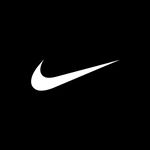

In [98]:
profile_pic = items[1]['media_or_ad']["user"]['profile_picture']
profile_pic = Image.open(urllib.request.urlopen(profile_pic))
profile_pic


In [99]:
items[1]['media_or_ad'].keys()

dict_keys(['taken_at', 'pk', 'id', 'device_timestamp', 'media_type', 'code', 'client_cache_key', 'filter_type', 'user', 'caption_is_edited', 'direct_reply_to_author_enabled', 'comment_likes_enabled', 'comment_threading_enabled', 'has_more_comments', 'max_num_visible_preview_comments', 'preview_comments', 'can_view_more_preview_comments', 'comment_count', 'like_count', 'has_liked', 'top_likers', 'photo_of_you', 'can_see_insights_as_brand', 'caption', 'injected', 'collapse_comments', 'ad_metadata', 'link', 'link_text', 'ad_action', 'link_hint_text', 'iTunesItem', 'ad_link_type', 'ad_header_style', 'dr_ad_type', 'android_links', 'iab_autofill_optout_info', 'force_overlay', 'hide_nux_text', 'overlay_text', 'overlay_title', 'overlay_subtitle', 'dominant_color', 'follower_count', 'post_count', 'collection_media_type', 'collection_media', 'fb_page_url', 'can_viewer_save', 'organic_tracking_token', 'expiring_at', 'preview', 'inventory_source', 'is_seen', 'is_eof', 'created_time', 'images', 'li

In [61]:
api = Client(user_name, password)
results = api.feed_timeline()

In [97]:
results["feed_items"][1]

{'media_or_ad': {'taken_at': 1586353893,
  'pk': 2282824375637989957,
  'id': '2282824375637989957_13460080',
  'device_timestamp': 1586353893,
  'media_type': 10,
  'code': 'B-uOKy6gVpF',
  'client_cache_key': 'MjI4MjgyNDM3NTYzNzk4OTk1Nw==.2',
  'filter_type': 0,
  'user': {'pk': 13460080,
   'username': 'nike',
   'full_name': 'nike',
   'is_private': False,
   'profile_pic_url': 'https://scontent-mad1-1.cdninstagram.com/v/t51.2885-19/s150x150/26155970_1584552474997482_4541081815552622592_n.jpg?_nc_ht=scontent-mad1-1.cdninstagram.com&_nc_ohc=2Z5fMU65-esAX9WvzfI&oh=48a64e752e88a22c7c76be5d5d6a6184&oe=5ED2F74E',
   'profile_pic_id': '1693695260376644961_13460080',
   'friendship_status': {'following': False,
    'outgoing_request': False,
    'is_muting_reel': False,
    'is_bestie': False,
    'is_restricted': False},
   'is_verified': True,
   'has_anonymous_profile_picture': False,
   'is_unpublished': False,
   'is_favorite': False,
   'latest_reel_media': 0,
   'id': '13460080',
 

In [96]:
image = results["feed_items"][1]['media_or_ad']['image_versions2']['candidates'][0]['url']

KeyError: 'image_versions2'

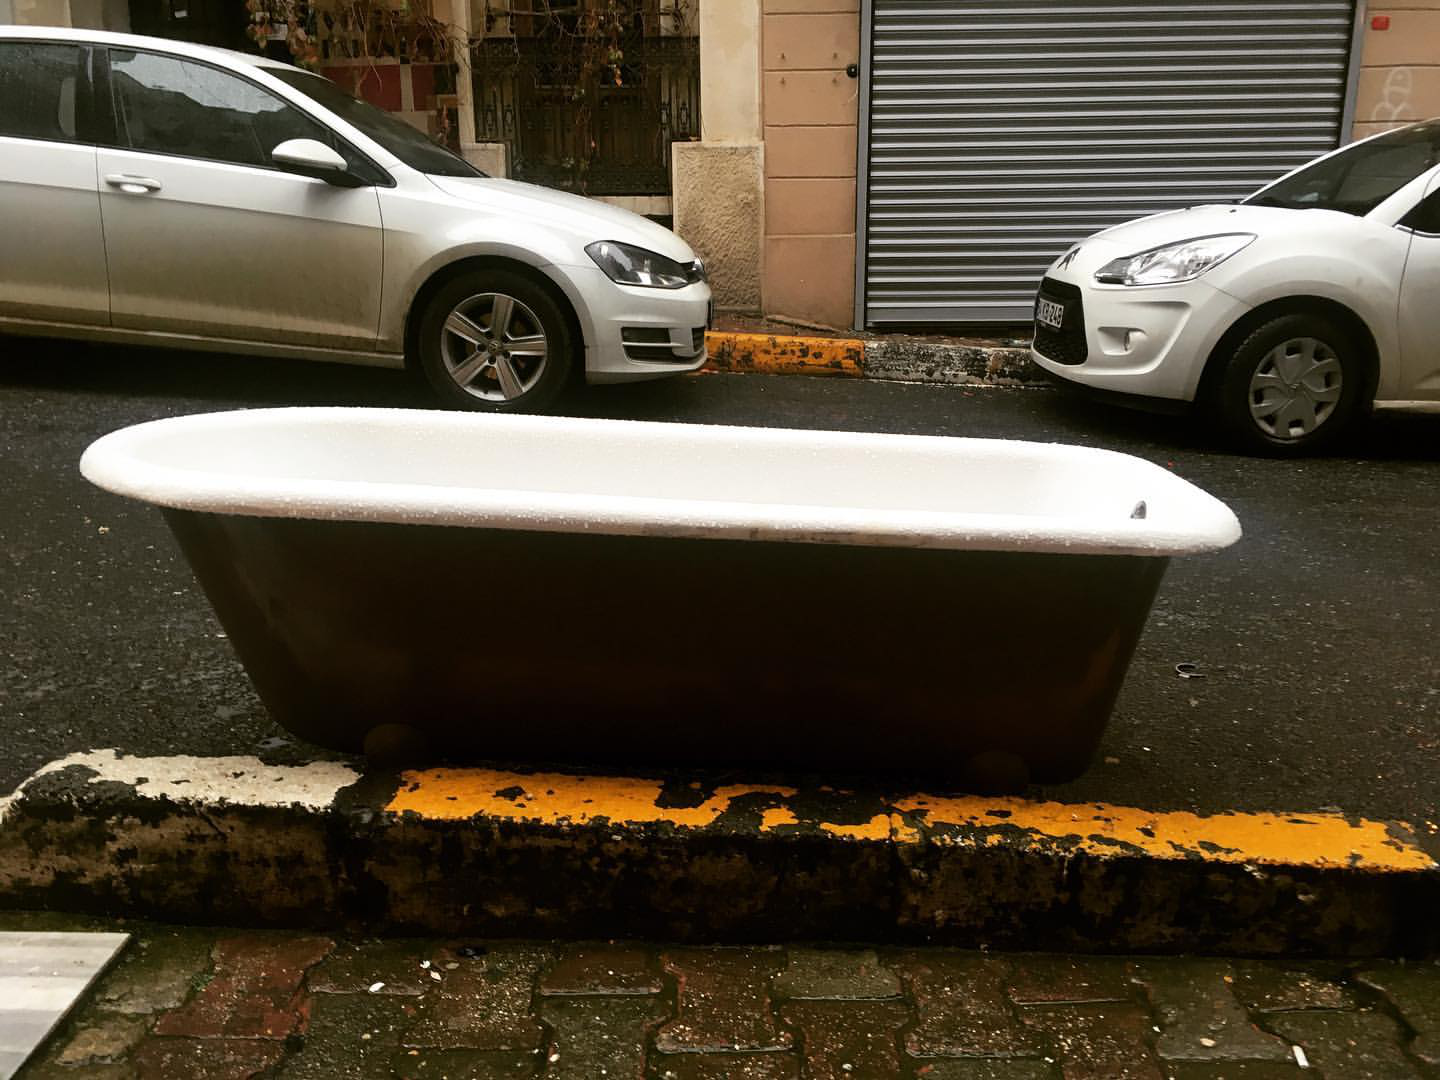

In [95]:
import urllib.request
from PIL import Image
url = 'http://www.example.com/my_image_is_not_your_image.png'
image = Image.open(urllib.request.urlopen(image))
image

In [220]:
from instagram.client import InstagramAPI

api =InstagramAPI(client_secret=settings.CLIENT_SECRET,
                   access_token=settings.ACCESS_TOKEN)

result = api.tag_recent_media(tag_name='castle')
media = result[0]

for m in media:
    print (m.images)
    print (m.user)
    print (m.tags)

ModuleNotFoundError: No module named 'instagram'